<a href="https://colab.research.google.com/github/yananma/5_programs_per_day/blob/master/0502.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.12 权重衰减

In [0]:
# !pip install mxnet d2lzh

In [0]:
%matplotlib inline 
import d2lzh as d2l 
from mxnet import autograd, gluon, init, nd 
from mxnet.gluon import data as gdata, loss as gloss, nn 

n_train, n_test, num_inputs = 20, 100, 200 
true_w, true_b = nd.ones((num_inputs, 1)) * 0.01, 0.05 

features = nd.random.normal(shape=(n_train + n_test, num_inputs))
labels = nd.dot(features, true_w) + true_b 
labels += nd.random.normal(scale=0.01, shape=labels.shape)
train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train], labels[n_train:]

In [4]:
features.shape

(120, 200)

In [5]:
labels.shape

(120, 1)

In [6]:
train_features.shape

(20, 200)

In [7]:
test_features.shape

(100, 200)

In [8]:
train_labels.shape

(20, 1)

In [0]:
def init_params():
    w = nd.random.normal(scale=1, shape=(num_inputs, 1))
    b = nd.zeros(shape=(1, ))
    w.attach_grad()
    b.attach_grad()
    return [w, b]

In [0]:
def l_2_penalty(w):
    return (w**2).sum() / 2 

In [0]:
batch_size, num_epochs, lr =1, 100, 0.003 
net, loss = d2l.linreg, d2l.squared_loss 
train_iter = gdata.DataLoader(gdata.ArrayDataset(train_features, train_labels), batch_size, shuffle=True)

def fit_and_plot(lambd):
    w, b = init_params()
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X, w, b), y) + lambd * l_2_penalty(w)
            l.backward()
            d2l.sgd([w, b], lr, batch_size)
        train_ls.append(loss(net(train_features, w, b), train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features, w, b), test_labels).mean().asscalar())
    print('final epoch: train loss:', train_ls[-1], 'test loss', test_ls[-1])
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss', 
          range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:', w.norm().asscalar())

final epoch: train loss: 2.42837e-13 test loss 72.098114


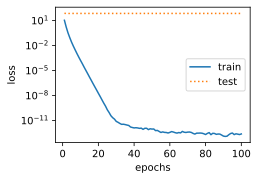

L2 norm of w: 13.311795


In [36]:
fit_and_plot(lambd=0)

final epoch: train loss: 3.8196962e-05 test loss 0.014413462


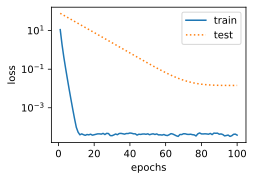

L2 norm of w: 0.050338864


In [37]:
fit_and_plot(lambd=1)

final epoch: train loss: 0.00017396636 test loss 0.015570062


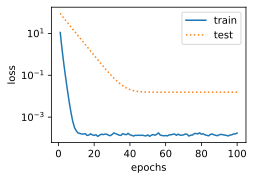

L2 norm of w: 0.034547932


In [38]:
fit_and_plot(lambd=2)

final epoch: train loss: 0.0004397938 test loss 0.011159011


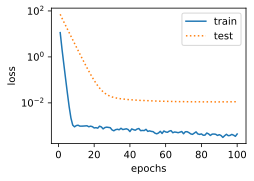

L2 norm of w: 0.037219092


In [39]:
fit_and_plot(lambd=3)

final epoch: train loss: 8.6707375e-14 test loss 111.53655


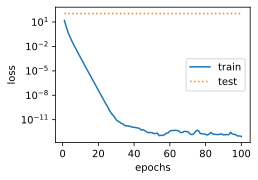

L2 norm of w: 13.511566


In [40]:
fit_and_plot(lambd=0)

final epoch: train loss: 0.0015041508 test loss 0.014272076


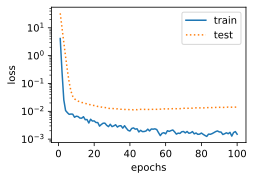

L2 norm of w: 0.023435922


In [41]:
fit_and_plot(lambd=10)

In [0]:
def fit_and_plot_gluon(wd):
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize(init.Normal(sigma=1))
    trainer_w = gluon.Trainer(net.collect_params('.*weight'), 'sgd', {'learning_rate': lr, 'wd': wd})
    trainer_b = gluon.Trainer(net.collect_params('.*bias'), 'sgd', {'learning_rate': lr})
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            trainer_w.step(batch_size)
            trainer_b.step(batch_size)
        train_ls.append(loss(net(train_features), train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features), test_labels).mean().asscalar())
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss', 
          range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:', net[0].weight.data().norm().asscalar())

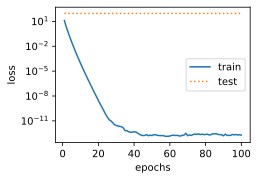

L2 norm of w: 13.254577


In [43]:
fit_and_plot_gluon(0)

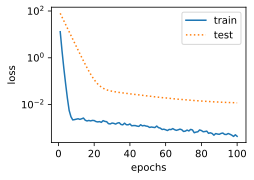

L2 norm of w: 0.047849488


In [44]:
fit_and_plot_gluon(3)